<a href="https://colab.research.google.com/github/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Bootcamp_Proj_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 5 do Bootcamp Data Science 3 - Criação de modelo preditivo para decisão de paciente se encontra apto ou não para ingressar na UTI
---
Autor: Vitor Rodrigues

e-mail: vitorfbaiano@gmail.com

---

## 1.Introdução


Com a chegada da pandemia do Corona Vírus no início de 2020 no Brasil, a nação precisou aplicar medidas emergenciais para combater sua disseminação.

Parte dos recursos do país foram usados para aumento vertiginoso de infraestrutura hospitalar.

Isto se deve ao fato de que mesmo aplicando medidas preventivas de disseminação da doença, grande parte da população está suscetível a adquirir a forma mais grave do vírus, especialmente aquelas que possuem idade acima de 60 anos ou alguma comorbidade física.

Dois anos após o início da pandemia no Brasil, vacinas foram criadas e a população conscientizada geraram uma redução nos casos graves de COVID-19 e, consequentemente, redução dos leitos ocupados em hospitais especificamente para atendimento de pessoas infectadas com o vírus.

Isto não significa que o combate a pandemia foi finalizado. Os órgãos de saúde precisam ficar atentos ao aparecimento de novas variáveis do vírus e foi com neste intuito que o Hospital Sírio-Libanês, localizado na capital de São Paulo e em Brasília-DF, levantou uma série de dados a respeito de pacientes que foram internados na UTI com caso grave do vírus.


Cerca de 300 pacientes registraram entrada no hospital e após realização de bateria de exames, foram encaminhados para leitos de UTI ou liberados para realização de tratamento em casa. Estes dados foram coletados em ordem de buscar um modelo preditivo que indique as chances de encaminhar o paciente para o leito de UTI após a realização de primeira bateria de exames.

## 2.Objetivos

Considerando o que foi explanado na introdução, este projeto tem como objetivo a criação de um modelo decisório para ingresso de pacientes na UTI dados certas variáveis. Para isto, serão realizados os seguintes passos:

- Importação dos dados do Sírio-Libanês;
- Realização de limpeza dos dados;
- Remover informações correlacionadas que dificultem o poder decisório de cada modelo;
- Criação de 5 modelos preditivo;
- Alteração de hiper pârametros para atingir melhor acurácia em cada modelo;
- Apurar modelo preditivo e salvá-lo para uso futuro;

## 3.Preparação dos dados

### 3.1. Leitura Inicial

Os dados do Sírio-Libanês possuem informações, deste a idade aproximada do paciente, gênero (feminino ou masculino), tipos de doenças preexistentes e resultados de exames de sangue, saturação e afins.

Sua última coluna (ICU - *Insensive Care Unit*) indica se o paciente foi ou não encaminhado para a UTI (1 para sim e 0 para não).

Além disso, o hospital utilizou conceito de **janelas de tempo** em que informa o momento em que o paciente foi admitido na UTI. Cada paciente é representado em 5 linhas do *Dataset* enviado: 

| ![Window1.PNG](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/dados/Imagens/Window1.PNG?raw=true) |
|:--:|
| Figura 1: Tabela de composição de horas de admissão hospitalar.
fonte: [Kaggle Sírio-Libanês](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19) |


Ou seja, uma vez que o paciente foi admitido na UTI, os dados posteriores não poderão ser usados pois o modelo necessita trabalhar apenas com os dados levantados previamente. Vide imagem abaixo como exemplo:

| ![Window2.PNG](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/dados/Imagens/Window2.PNG?raw=true) |
|:--:|
| Figura 2: Exemplo de modelagem dos dados de acordo com admissão de paciente.
fonte: [Kaggle Sírio-Libanês](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19) |

Todos os dados do Sírio-Libanês foram anonimizados seguindo as melhores práticas e recomendações internacionais. Os dados foram limpos e dimensionados por coluna de acordo com o Min Max Scaler para caber no intervalo de -1 e 1.

Informação Disponível

1. Informações demográficas do paciente (03)
1. Doenças agrupadas anteriores do paciente (09)
1. Resultados de sangue (36)
1. Sinais vitais (06)

In [1]:
import pandas as pd

Sirio_Libanes_URL = 'https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'

In [2]:
dados = pd.read_excel(Sirio_Libanes_URL)
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


No total são 54 características, expandidas quando pertinentes à média, mediana, max, min, diff e diff relativo.
- diff = max - min
- diff relativo = diff/mediana
- Alguns itens NaN
- Número total de pacientes: 384 (vide número máximo no PACIENTE_VISIT_IDENTIFIER)
- Cada paciente separado em 5 janelas de tempo (vide coluna Window)

In [3]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2. Categorização de dados

Pela aplicação da função
```describe()```
analisamos estatísticamente todo DataFrame() cujas colunas são do tipo inteira ou categórica. Vemos que das 231 colunas informadas anteriormente, apenas 229 foram descritas. 

Abaixo iremos identificar colunas não categorizadas no *Dataset*.

In [4]:
for coluna in dados.columns:
  if coluna not in dados.describe().columns:
    print(coluna)

AGE_PERCENTIL
WINDOW


In [5]:
dados[['AGE_PERCENTIL', 'WINDOW']]

,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


A coluna **WINDOW** será agrupada mais a frente e por isso, não será categorizada. No entanto, a coluna  **AGE_PERCENTIL** a qual indica a margem de idade em que o paciente registrado se encontra, será categorizado para participar dos dados decisórios do modelo.  

Para categorizar, existem algumas metodologias:
1. Find and Replace;
2. Label Encoding;
3. One Hot Encoding
4. OriginalEncoder (do Scikit-Learn)
5. OneHotEncoder (do Scikit-Learn)

Neste caso, será usada a primeira. As demais metodologias de categorização podem ser encontradas no [link](https://raw.githubusercontent.com/VitorFRodrigues/Data-Science-Bootcamp/main/Proj05_final/Notebook/Saiba_mais/Metodologias_de_Categorizacao.ipynb).


Primeiro encontramos os valores apresentados no conjunto de dados. Desse modo aplicamos a função ```unique()``` para remoção de valores repetidos. 

In [6]:
dados_categorizar = dados['AGE_PERCENTIL']
dados_categorizar.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [7]:
dados_categorizar.value_counts()

20th          215
10th          205
30th          205
40th          200
70th          195
50th          190
80th          190
60th          185
Above 90th    185
90th          155
Name: AGE_PERCENTIL, dtype: int64

Agora criamos um dicionário categorizando cada valor. Em seguida substituímos as *strings* por seu correspondente categorizado:

In [8]:
substituir = {"60th": 60, 
              "10th": 10, 
              "40th": 40, 
              "70th": 70, 
              "20th": 20, 
              "50th": 50, 
              "80th": 80, 
              "30th": 30,
              "90th": 90, 
              "Above 90th": 100}
dados_categorizado_find_replace = dados_categorizar.replace(substituir)
dados_categorizado_find_replace

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

A partir deste momento, estamos modificando os dados originais recebidos do Sírio-Libanês, sendo assim, os dados modificados serão adicionados em novo *DataFrame* ```dados_limpos```

In [9]:
dados_limpos = dados
dados_limpos['AGE_PERCENTIL'] = dados_categorizado_find_replace

In [10]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,53.194805,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,28.673479,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora com todas as variáveis categóricas necessárias para aplicação do modelo, podemos tratar os dados para futuro recebimento do modelo.

### 3.3. Remoção de linhas desnecessárias ao modelo

Como já foi explicado, temos 384 pacientes subdivididos em 5 janelas de tempo. Conforme mostrado na figura 2, uma vez que o paciente se encontra na UTI em determinada janela de tempo, nós não podemos mais utilizar aqueles dados para treinar o modelo.

Sendo assim, aquele paciente que já se encontra na UTI na janela das 2 primeiras horas não servirá para treinar o modelo. Para removermos os pacientes que foram para a UTI na primeira janela de tempo, utilizamos o código abaixo: 

In [11]:
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1765.000000,1765.000000,1765.000000,1765.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1053.000000,1103.000000,1111.000000,1108.000000,1108.000000,1112.000000,1053.000000,1103.000000,1111.000000,1765.000000
mean,192.835694,0.456091,52.662890,0.379603,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,...,-0.721133,-0.775375,-0.892071,-0.796061,-0.729520,-0.819947,-0.733648,-0.776424,-0.891971,0.201133
std,110.481302,0.498209,28.882085,0.485426,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,...,0.466468,0.308266,0.288869,0.311507,0.402389,0.267913,0.433956,0.306903,0.289193,0.400961
min,0.000000,0.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,98.000000,0.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-1.000000,-1.000000,-1.000000,-0.976451,-0.980533,0.000000
75%,289.000000,1.000000,80.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.647275,-0.541827,-0.664947,-0.681582,-0.595796,-0.881390,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


Como pode ser visto na contagem (*count*) de PATIENT_VISIT_IDENTIFIER, temos ```1.765``` o que antes eram ```1.925```. A diferença é igual a ```160``` e como tempos ```5``` janelas de tempo para cada paciente, fazemos ```160/5=32``` pacientes que foram removidos da lista.

De maneira similar, iremos remover as janelas após o primeiro indicativo de entrada na UTI.

Por exemplo, se um determinado paciente que entrou na UTI na janela "2-4", não há necessidade de mantermos as janelas seguintes para treinarmos nosso modelo. 

Vide novo exemplo abaixo para melhorar entendimento. No *DataFrame* criado, temos 2 pacientes. O primeiro ingressa na UTI na **janela 3**, já o segundo ingressa na **janela 2**.

In [12]:
dados_exemplo = pd.DataFrame([[1, None, 1, 0], [1, 1, 2, 0], [1, None, 3, 1],
                           [2, None, 1, 0], [2, None, 2, 1], [2, 6, 3, 1]
                          ], columns=['usuario', 'medida', 'janela', 'UTI'])
dados_exemplo

,usuario,medida,janela,UTI
0,1,NaN,1,0
1,1,1.0,2,0
2,1,NaN,3,1
3,2,NaN,1,0
4,2,NaN,2,1
5,2,6.0,3,1


As medidas na **janela 3** do **paciente 2** não são interessantes para nosso modelo, sendo assim iremos remove-la. 

In [13]:
dados_exemplo_pos_limpeza = pd.DataFrame([[1, None, 1, 0], [1, 1, 2, 0], [1, None, 3, 1],
                           [2, None, 1, 0], [2, None, 2, 1]
                          ], columns=['usuario', 'medida', 'janela', 'UTI'])
dados_exemplo_pos_limpeza

,usuario,medida,janela,UTI
0,1,NaN,1,0
1,1,1.0,2,0
2,1,NaN,3,1
3,2,NaN,1,0
4,2,NaN,2,1


Sendo assim, faremos uma varredura do *Dataframe* e retirando as janelas após primeiro indicativo de entrada na UTI.

In [14]:
varredura = dados_limpos.reset_index()
linhas_a_remover = []
aux = 0
for i in range(0, len(varredura), 5):
  for j in range(0,5):
    aux += varredura['ICU'][i+j]
    if aux > 1:
      linhas_a_remover.append(i+j)
  aux = 0

In [15]:
print(len(linhas_a_remover))
print(len(dados_limpos))

192
1765


In [16]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [17]:
dados_limpos.drop(dados_limpos.index[[linhas_a_remover]], inplace=True)

Conforme informado acima, as linhas da varredura foram removidas do conjunto de dados
```
dados_limpos_antes = 1.765 linhas
linhas_removidas = 192
dados_limpos_atual = 1.765 - 192 = 1.573 linhas
```
Podemos ver abaixo que os dados limpos agora possuem ```1.573``` linhas.

In [18]:
dados_limpos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


### 3.4. Manipulação de valores nulos.

Várias linhas deste *DataFrame* possuem pelo menos uma coluna contendo ```NaN``` (*Not-a-Number*). O código abaixo mostra que das ```1.765``` linhas, ```1.290``` possuem um valor nulo em alguma coluna, representando mais de 70% dos dados. Retirar todas estas linhas não faz sentido e nem auxiliará na criação do modelo preditivo. 

In [19]:
is_NaN = dados_limpos.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dados_limpos[row_has_NaN]
rows_with_NaN.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1213.000000,1213.000000,1213.000000,1213.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,...,511.000000,562.000000,572.000000,565.000000,565.000000,570.000000,511.000000,562.000000,572.000000,1213.000000
mean,192.083265,0.439406,51.492168,0.380874,0.093543,0.019868,0.091060,0.018212,0.117550,0.043874,...,-0.955796,-0.953271,-0.981952,-0.960823,-0.951818,-0.965630,-0.958625,-0.953939,-0.981996,0.069250
std,110.609162,0.496520,28.409418,0.485802,0.291313,0.139603,0.287813,0.133772,0.322208,0.204900,...,0.126093,0.099230,0.036603,0.097024,0.119110,0.084283,0.113684,0.097468,0.036653,0.253983
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,189.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,289.000000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.952381,-0.979798,-1.000000,-1.000000,-0.986609,-1.000000,-0.953567,-0.980026,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.058824,-0.238095,-0.777778,-0.140665,-0.097289,-0.417142,0.253456,-0.285468,-0.775609,1.000000


Sendo assim, vamos preencher estes valores nulos com informações. Mas não serão quaisquer números, vamos separar cada paciente em suas respectivas janelas de tempo e preencher os valores nulos com o mesmo número indicado na linha anterior ou posterior.

Por exemplo: 

Imagine que foi separado a seguinte janela de tempo para ser tratada:

In [20]:
dados_fake = pd.DataFrame([[None, None, "0-2"], [None, 6, "2-4"], [2, None, "4-6"], [1, 5, "6-12"], [None, None, "12_ABOVE"]
                          ], columns=['medida1', 'medida2', 'janela'])
dados_fake

,medida1,medida2,janela
0,NaN,NaN,0-2
1,NaN,6.0,2-4
2,2.0,NaN,4-6
3,1.0,5.0,6-12
4,NaN,NaN,12_ABOVE


Vamos preencher os dados nulos com os valores existentes em cada medida. Primeiramente preencheremos os valores para trás:

In [21]:
dados_fake_preench_para_tras = pd.DataFrame([[2, 6, "0-2"], [2, 6, "2-4"], [2, 5, "4-6"], [1, 5, "6-12"], [None, None, "12_ABOVE"]
                          ], columns=['medida1', 'medida2', 'janela'])
dados_fake_preench_para_tras

,medida1,medida2,janela
0,2.0,6.0,0-2
1,2.0,6.0,2-4
2,2.0,5.0,4-6
3,1.0,5.0,6-12
4,NaN,NaN,12_ABOVE


Depois preenchemos os valores que sobrarem para frente:

In [22]:
dados_fake_preench_para_frente = pd.DataFrame([[2, 6, "0-2"], [2, 6, "2-4"], [2, 5, "4-6"], [1, 5, "6-12"], [1, 5, "12_ABOVE"]
                          ], columns=['medida1', 'medida2', 'janela'])
dados_fake_preench_para_frente

,medida1,medida2,janela
0,2,6,0-2
1,2,6,2-4
2,2,5,4-6
3,1,5,6-12
4,1,5,12_ABOVE


Agora podemos preencher os valores NaN para frente e para trás com a seguinte função:

In [23]:
def preenche_tabela (dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [24]:
dados_limpos = preenche_tabela(dados_limpos)
dados_limpos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [25]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1573.000000,1573.000000,1573.000000,1573.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,194.436745,0.425302,50.584870,0.380801,0.101403,0.024235,0.092474,0.018495,0.120536,0.049745,...,-0.829849,-0.848772,-0.930719,-0.859662,-0.817596,-0.875762,-0.833602,-0.849792,-0.930682,0.103624
std,110.802448,0.494546,28.343382,0.485738,0.301958,0.153826,0.289787,0.134775,0.325691,0.217487,...,0.333809,0.251921,0.220481,0.244270,0.318429,0.217787,0.318533,0.250304,0.221216,0.304869
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,194.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,292.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.785714,-0.939394,-0.788280,-0.738255,-0.813580,-0.787721,-0.795326,-0.938475,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.941176,0.333333,0.939394,0.695652,0.830052,0.444757,0.806452,0.329660,0.958324,1.000000


Vamos fazer nova verificação da tabela em busca de itens com NaN.

In [26]:
is_NaN = dados_limpos.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dados_limpos[row_has_NaN]
rows_with_NaN.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.0
mean,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
std,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.241267e-16,0.000000,0.000000,0.0
min,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
25%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
50%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
75%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
max,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0


Conforme mostrado, ainda existe 1 paciente com linhas nulas. Vamos remover esta linha.

In [27]:
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,194.422194,0.426658,50.714286,0.382015,0.101403,0.024235,0.092474,0.018495,0.120536,0.049745,...,-0.829869,-0.849581,-0.930755,-0.860462,-0.818267,-0.876036,-0.833654,-0.850589,-0.930722,0.103954
std,110.978782,0.494750,28.295550,0.486035,0.301958,0.153826,0.289787,0.134775,0.325691,0.217487,...,0.334341,0.251914,0.220832,0.244247,0.318714,0.218080,0.319039,0.250304,0.221568,0.305298
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,193.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,292.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.809524,-0.939394,-0.791304,-0.745748,-0.817279,-0.785952,-0.809259,-0.938802,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.941176,0.333333,0.939394,0.695652,0.830052,0.444757,0.806452,0.329660,0.958324,1.000000


### 3.5. Unificação das janelas de admissão.

Para finalizar a manipulação dos dados recebidos, vamos unificar as janelas de tempo de cada paciente. 

Em outras palavras, vamos utilizar uma única linha para cada paciente, sendo que nesta linha, todos os dados de entrada (x) serão os dados da janela '0-2' e todos os dados de saída (y) serão compilados indicando se o paciente foi ou não para a UTI contando a partir da janela '2-4' em diante.

Com isto, teremos um conjunto de dados que treinará o modelo para que seja capaz de decidir se o paciente entrará na UTI logo após a realização da primeira bateria de exames. Desse modo teremos o processo decisório agindo a tempo do hospital tomar suas devidas providencias quanto a mobilização de recursos.

In [28]:
import numpy as np
def prepare_window(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW']=="0-2", "ICU"] = 1
    return rows.loc[rows['WINDOW']=="0-2"]

In [29]:
dados_limpos = dados_limpos.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)
dados_limpos

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,100,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
382,1910,382,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


## 4.Aplicação dos modelos Machine Learning

Agora que temos o nosso conjunto de dados devidamente filtrado, vamos aplicar os modelos de ML para solucionar o problema. Antes disso, vamos identificar dados que estejam correlacionados uns com os outros. Com isto é possível melhorar o processamento do modelo treinando-o a associar variáveis realmente necessárias.

### 4.1. Investigando dados correlacionados

Vamos investigar os dados recebidos e trabalhar em labels que possuam alta correlação entre si para removê-las. Primeiramente, vamos encontrar os dados possíveis de serem correlacionados puxando um informe do DataFrame.

In [30]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(5), object(1)
memory usage: 650.3+ KB


A grande maioria dos dados são do tipo 'float64', vamos identificar suas correlações. Para isto, vamos remover as colunas que não pertencem a este grupo:

In [31]:
dados_limpos.select_dtypes(exclude='float64')

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,
0,0,0,1,60,0,0-2,1
2,10,2,0,10,0,0-2,1
3,15,3,0,40,1,0-2,0
4,20,4,0,10,0,0-2,0
5,25,5,0,10,0,0-2,0
...,...,...,...,...,...,...,...
380,1900,380,0,40,1,0-2,1
381,1905,381,1,100,0,0-2,0
382,1910,382,0,50,0,0-2,1


Agora gerando matriz de correlação, temos:

In [32]:
# Matriz de correlação dos dados do tipo float, absolutos
matrix_corr = dados_limpos.iloc[:,4:-2].corr().abs()
matrix_corr

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,0.008609,...,0.087544,0.012927,0.029743,0.030408,0.022641,0.032521,0.058050,0.008267,0.028664,0.031025
DISEASE GROUPING 2,0.196347,1.000000,0.084392,0.114818,0.112878,0.032173,0.118516,0.139947,0.068432,0.032527,...,0.005591,0.019113,0.029415,0.006198,0.052208,0.003658,0.011430,0.021024,0.029332,0.009406
DISEASE GROUPING 3,0.278271,0.084392,1.000000,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,0.035221,...,0.010268,0.022227,0.028704,0.013483,0.019591,0.026986,0.008790,0.043475,0.030743,0.013702
DISEASE GROUPING 4,0.017529,0.114818,0.308875,1.000000,0.128287,0.171438,0.136472,0.103100,0.063919,0.049397,...,0.026323,0.007996,0.009004,0.018115,0.043661,0.030331,0.031272,0.006123,0.009871,0.017871
DISEASE GROUPING 5,0.340370,0.112878,0.293259,0.128287,1.000000,0.129836,0.459169,0.108849,0.149025,0.081783,...,0.004429,0.058447,0.055893,0.046644,0.024357,0.038660,0.031381,0.063897,0.054633,0.046307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,0.032521,0.003658,0.026986,0.030331,0.038660,0.009682,0.092685,0.046534,0.035569,0.055020,...,0.513637,0.510188,0.525932,0.494600,0.841331,1.000000,0.507380,0.511450,0.524584,0.493627
HEART_RATE_DIFF_REL,0.058050,0.011430,0.008790,0.031272,0.031381,0.009684,0.109317,0.048604,0.055597,0.044277,...,0.981120,0.666138,0.747143,0.822419,0.442216,0.507380,1.000000,0.694807,0.751722,0.820666
RESPIRATORY_RATE_DIFF_REL,0.008267,0.021024,0.043475,0.006123,0.063897,0.051314,0.087185,0.045797,0.082997,0.002206,...,0.672906,0.980859,0.645794,0.674359,0.441363,0.511450,0.694807,1.000000,0.648221,0.672633
TEMPERATURE_DIFF_REL,0.028664,0.029332,0.030743,0.009871,0.054633,0.014751,0.101442,0.033076,0.011825,0.058887,...,0.710626,0.624274,0.999714,0.739819,0.442441,0.524584,0.751722,0.648221,1.000000,0.738160


Analisando a matriz, vemos que seu triangulo superior é igual ao triangulo inferior com toda diagonal principal com valores unitários. O código abaixo remove a diagonal principal e triangulo inferior, além de indicar quais são as colunas que deverão ser removidas.

In [33]:
alta_corr = 0.95
matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]
len(excluir)

124

Vamos passar para uma função de modo a automatizar o processo.

In [34]:
def remove_corr_var(dados, valor_corte = 0.95):
  
  colunas_a_excluir = dados.select_dtypes(exclude='float64')
  matrix_corr = dados.drop(colunas_a_excluir, axis=1).corr().abs()
  matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
  excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
  
  return dados.drop(excluir, axis=1)

Foi escolhido 0,95 como valor de corte padrão para remoção de colunas.

In [35]:
dados_limpos_sem_corr = remove_corr_var(dados_limpos, 0.95)
dados_limpos_sem_corr

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
3,15,3,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,0-2,0
5,25,5,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.333333,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.072464,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,100,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072464,0.526316,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,0-2,0
382,1910,382,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.246377,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


Agora temos um conjunto de dados com baixa correlação entre suas variáveis de modo que facilitará o processo decisório do modelo.

### 4.2. Separação dos dados de treino e teste

Uma vez que o conjunto de dados foi filtrado, precisamos separá-los em dados de treino (treinar o modelo) e dados de teste (testar o modelo)

Primeiramente iremos separar os dados tratados em um conjunto de entrada (x) e saída (y).
  
*   A saída será basicamente uma matriz coluna contendo os resultados da UTI. 
*   A entrada serão todo o conjunto de dados coletados, com exceção dos dados de saída (UTI) e a coluna WINDOW a qual possui o mesmo valor em todas as linhas. Sendo assim, será necessário retirar as colunas 'ICU' e 'WINDOW' dos dados.

In [36]:
x_columns = dados_limpos_sem_corr.columns
y = dados_limpos_sem_corr["ICU"]
x = dados_limpos_sem_corr[x_columns].drop(["ICU","WINDOW"], axis=1)

Estes passos para separação de dados em entrada/saída são repetidos em demasia. Desse modo, será criada uma função para evitar retrabalho.

In [37]:
def separar_x_y(dados):
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU","WINDOW"], axis=1)
  return  x,y

In [38]:
x,y = separar_x_y(dados_limpos_sem_corr)

Agora com os valores de entrada e saída devidamente criados, utilizamos o Train-Test-Split para separação em dados de treino e teste. Esta biblioteca separa os dados em aproximadamente 75% de seu conteúdo para treino e 25% para testes.

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

Além disso, esta biblioteca (*lib*) estratifica os dados fazendo com que tenhamos o mesmo percentual de pacientes que foram para UTI tanto no conjunto de treino quanto no conjunto de teste.

Segue abaixo um *DataFrame* o qual informa sua estratificação: 

In [40]:
estratificacao = pd.DataFrame(
    [
     [len(x_train), len(x_test)],
     [len(y_train), len(y_test)],
     [len(x_train)/len(x)*100, len(x_test)/len(x)*100],
     [len(y_train)/len(y)*100, len(y_test)/len(y)*100],
     [y_train.value_counts()[0], y_test.value_counts()[0]],
     [y_train.value_counts()[1], y_test.value_counts()[1]],
     [y_train.value_counts()[0]/y.value_counts()[0]*100, y_test.value_counts()[0]/y.value_counts()[0]*100],
     [y_train.value_counts()[1]/y.value_counts()[1]*100, y_test.value_counts()[1]/y.value_counts()[1]*100],
    ], index=['x', 'y', '%x', '%y', 'y=0', 'y=1', '%y=0', '%y=1'], columns=['Treino', 'Teste']
)
estratificacao

,Treino,Teste
x,264.000000,88.000000
y,264.000000,88.000000
%x,75.000000,25.000000
%y,75.000000,25.000000
y=0,142.000000,47.000000
y=1,122.000000,41.000000
%y=0,75.132275,24.867725
%y=1,74.846626,25.153374


Entretanto, esta biblioteca possui um fator randômico em seu núcleo, fazendo com que sempre que for executada, diferente conjunto de dados serão escolhidos para treino e teste.

Para reduzir esta aleatoriedade, podemos treinar e testar o mesmo modelo várias vezes, obtendo assim uma média e intervalo de confiança desejado.  

Entretanto, como podemos avaliar se o modelo estudado é bom o suficiente para utilização?

### 4.3. Métricas para avaliação do modelo de estudo

Bem, para demonstrar os tipos de métricas principais para se aplicar em modelos de ML, vamos precisar criar um modelo genérico apenas a título de exemplificação.

Utilizaremos o modelo de regressão logística ([Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

In [41]:
from sklearn.linear_model import LogisticRegression

modelo_LogReg = LogisticRegression(max_iter=10000)
modelo_LogReg.fit(x_train, y_train)
predicao_logisticReg = modelo_LogReg.predict(x_test)

A métrica mais comum de avaliação é a acurácia na qual mede todos os acertos dividido pelo total dos testes

In [42]:
accuracy = sum(predicao_logisticReg == y_test)/len(y_test)
accuracy

0.6363636363636364

Ou podemos utilizar a biblioteca accuracy_score a qual calcula a acurácia automaticamente.

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicao_logisticReg)

0.6363636363636364

No entanto, dependendo do modelo, é interessante saber a quantidade de acertos positivos e acertos negativos. Para isto podemos utilizar a árvore de confusão

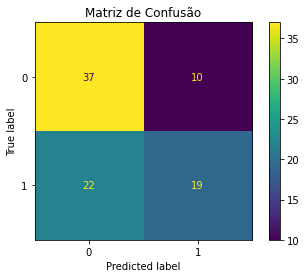

In [44]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_LogReg, x_test, y_test)
plt.title("Matriz de Confusão")
plt.show()

O gráfico acima indica o número de testes previstos corretamente ou incorretamente, tal qual como mostrado logo abaixo:

In [45]:
# Verdadeiro Positivo - Foi previsto (Predicted Label) 1 e Testado (True Label) 1
VP = 30
# Verdadeiro Negativo - Foi previsto (Predicted Label) 0 e Testado (True Label) 1
VN = 36
# Falso Positivo - Foi previsto (Predicted Label) 1 e Testado (True Label) 0
FP = 11
# Falso Negativo - Foi previsto (Predicted Label) 0 e Testado (True Label) 1
FN = 11

Esta matriz é de extrema importância em estudos como este onde é preferível o máximo verdadeiro positivo possível em relação ao verdadeiro negativo. 

Podemos chegar ao mesmo valor da acurácia calculando:

In [46]:
(VN+VP)/(VN+VP+FP+FN)

0.75

Por último temos uma métrica que tem a capacidade de separar muito bem os resultados positivos e negativos de um modelo em teste. Esta métrica é a AUC (*area under the curve*). Esta área é calculada a partir da curva ROC (Receiver Operator Characteristic), para mais informações a respeito desta curva visite o [link](https://www.youtube.com/watch?v=4jRBRDbJemM).



In [47]:
from sklearn.metrics import roc_auc_score

prob_logisticReg = modelo_LogReg.predict_proba(x_test) #Retorna matriz que indica chances da classe ser 0 (1ª coluna) e da classe ser 1 (2ª coluna)
roc_auc_score(y_test, prob_logisticReg[:,1]) #Informa a probabilidade da classe ser 1

0.7426050856253243

Com a métrica AUC, vamos criar uma função que medirá o grau de assertividade dos modelos criados posteriormente.

In [48]:
def roda_modelo(modelo, dados, valor_corte=0.95):

  dados_sem_corr = remove_corr_var(dados, valor_corte)

  x,y = separar_x_y(dados_sem_corr)

  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  modelo.fit(x_train, y_train)
  predicao = modelo.predict(x_test)
  prob_predic = modelo.predict_proba(x_test)

  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f"AUC {auc}")

In [49]:
teste1 = roda_modelo(modelo_LogReg, dados_limpos)
teste2 = roda_modelo(modelo_LogReg, dados_limpos)
teste3 = roda_modelo(modelo_LogReg, dados_limpos)

AUC 0.7597301504929943
AUC 0.7602490918526207
AUC 0.8417228853139594


Os testes mostrados anteriormente demonstram que a função ainda precisa ser melhorada. As aplicações estão gerando AUCs diferentes pois a função train_test_split possui uma condição randômica em que põe aleatoriamente os dados de teste e treino a cada vez que a função é chamada. 

Vamos refazer a função, sendo desta vez aplicando um pouco de estatística. Vamos rodar o modelo "n" vezes de modo a extrair um AUC médio com desvio padrão, desse modo teremos um intervalo de assertividade do modelo.

In [50]:
import numpy as np
def roda_n_modelo(modelo, dados, n, valor_corte=0.95):

  dados_sem_corr = remove_corr_var(dados, valor_corte)

  x,y = separar_x_y(dados_sem_corr)

  auc_lista = []
  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train, y_train)
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    auc_lista.append(auc)

  auc_media = np.mean(auc_lista)
  auc_std = np.std(auc_lista)
  print(f"AUC {auc_media}")
  print(f"Intervalo [{auc_media - 2*auc_std},{auc_media + 2*auc_std}]")
  print(f"Diferença: {4*auc_std}")

In [51]:
teste1 = roda_n_modelo(modelo_LogReg, dados_limpos, 50)
print('')
teste2 = roda_n_modelo(modelo_LogReg, dados_limpos, 50)
print('')
teste3 = roda_n_modelo(modelo_LogReg, dados_limpos, 50)

AUC 0.7655630513751945
Intervalo [0.682515424679405,0.8486106780709841]
Diferença: 0.16609525339157916

AUC 0.7637882719252724
Intervalo [0.6781980691929556,0.8493784746575893]
Diferença: 0.1711804054646337

AUC 0.7653969901401143
Intervalo [0.6846951273842327,0.846098852895996]
Diferença: 0.16140372551176338


Agora é possível identificar que os testes possuem uma menor variação.

Além disso, para melhor visualização de curvas entre modelos, podemos plotar a curva ROC conforme mostrado abaixo. A título comparativo, iremos comparar o modelo Logistic Regression com o RandomForestClassifier.

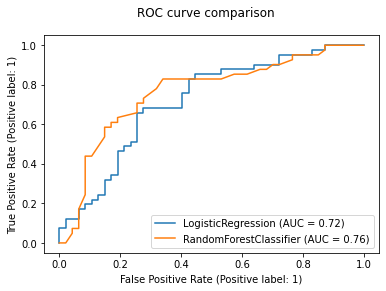

In [52]:
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

x,y = separar_x_y(dados_limpos_sem_corr)

np.random.seed(73246)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

modelo_LogReg = LogisticRegression()
modelo_LogReg.fit(x_train, y_train)

modelo_RFC = RandomForestClassifier()
modelo_RFC.fit(x_train, y_train)

logisticReg_disp = plot_roc_curve(modelo_LogReg, x_test, y_test)
RFC_disp = plot_roc_curve(modelo_RFC, x_test, y_test, ax=logisticReg_disp.ax_)
RFC_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Com o gráfico mostrado, é possível visualizar que o modelo RandomForestClassifier possui melhor assertividade, o qual é comprovado pelo AUC calculado na legenda.

Podemos então incrementar nossa função para receber múltiplos modelos e plotar a ROC curve:

In [53]:
def roda_n_modelo_roc(modelo: list, dados, n, valor_corte=0.95):
  
  dados_sem_corr = remove_corr_var(dados, valor_corte)

  x,y = separar_x_y(dados_sem_corr)
  
  auc_lista_modelos = []
  auc_lista = []
  for i in range(len(modelo)):
    for _ in range(n):
      x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
      modelo[i].fit(x_train, y_train)
      prob_predic = modelo[i].predict_proba(x_test)
      auc = roc_auc_score(y_test, prob_predic[:,1])
      auc_lista.append(auc)
    auc_lista_modelos.append(auc_lista)

    #Média, Desvio Padrão e ROC do Modelo [i]
    auc_media = np.mean(auc_lista_modelos[i])
    auc_std = np.std(auc_lista_modelos[i])
    print(f"AUC Médio do Modelo {type(modelo[i]).__name__}: {auc_media:.4f}")
    print(f"Intervalo do Modelo {type(modelo[i]).__name__}: [{(auc_media - 2*auc_std):.4f},{(auc_media + 2*auc_std):.4f}]")
    print(f"Diferença: {4*auc_std:.4f}\n")
    if i==0:
      for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo[i].fit(x_train, y_train)
        prob_predic = modelo[i].predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        if abs(auc - auc_media) <= 0.005:
          modelo_disp = plot_roc_curve(modelo[i], x_test, y_test)
          break
    else:
      for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
        modelo[i].fit(x_train, y_train)
        prob_predic = modelo[i].predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        if abs(auc - auc_media) <= 0.005:
          modelo_disp = plot_roc_curve(modelo[i], x_test, y_test, ax=modelo_disp.ax_)
          break
    modelo_disp.figure_.suptitle("ROC curve comparison")

  plt.show()

AUC Médio do Modelo LogisticRegression: 0.7751
Intervalo do Modelo LogisticRegression: [0.6889,0.8614]
Diferença: 0.1726

AUC Médio do Modelo RandomForestClassifier: 0.7848
Intervalo do Modelo RandomForestClassifier: [0.7044,0.8653]
Diferença: 0.1608



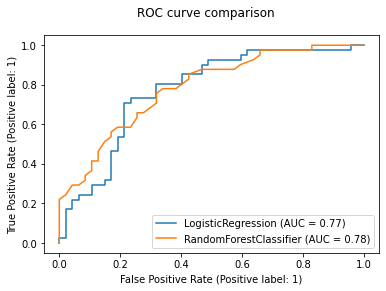

In [54]:
roda_n_modelo_roc([modelo_LogReg, modelo_RFC], dados_limpos, 50)

Por fim temos a última métrica: **Validação Cruzada**

A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição. Busca-se então estimar o quão preciso é este modelo na prática, ou seja, o seu desempenho para um novo conjunto de dados.

O conceito central das técnicas de validação cruzada é o particionamento do conjunto de dados em subconjuntos mutuamente exclusivos, e posteriormente, o uso de alguns destes subconjuntos para a estimar os parâmetros do modelo (dados de treinamento), sendo os subconjuntos restantes (dados de validação ou de teste) empregados na validação do modelo.

Ou seja, dividimos nossos dados em partes e utilizamos cada uma delas para teste. De modo a garantir não haja viés de ordem, ao invés de dividir em  partes ordenadas, utilizaremos a função sample para embaralhar os dados antes de fazer a divisão. Por fim, o método RepeatedStratifiedKFold mantém a estratificação dos dados de modo que tenhamos aproximadamente a mesma proporção de resultados positivos (y=1) e negativos (y=0) entre os dados de treino e teste, além de possibilitar repetição da estratificação garantindo todos os testes necessários.

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)
resultados = cross_validate(modelo_LogReg, x, y, cv=cv)
resultados

{'fit_time': array([0.04229546, 0.03716755, 0.03792858, 0.03948617, 0.04231381,
        0.06404018, 0.04015231, 0.03960371, 0.04774714, 0.03934431,
        0.04016829, 0.03979397, 0.04777932, 0.0373354 , 0.04482269,
        0.03728533, 0.04026008, 0.03793454, 0.04618478, 0.03882885,
        0.03914261, 0.04542732, 0.0368824 , 0.0393889 , 0.04289055,
        0.03743672, 0.05700564, 0.04433489, 0.037956  , 0.0410881 ,
        0.03759432, 0.03759909, 0.04271722, 0.03770804, 0.04083133,
        0.04393625, 0.03843665, 0.03858352, 0.04221034, 0.03811145,
        0.04995131, 0.03640103, 0.03681755, 0.04069662, 0.03762579,
        0.03877926, 0.04324198, 0.03709292, 0.05629301, 0.0376699 ]),
 'score_time': array([0.00432467, 0.00529528, 0.0044477 , 0.00441003, 0.00447869,
        0.00441933, 0.00456858, 0.0043869 , 0.00485945, 0.00433683,
        0.00450945, 0.00457478, 0.00450253, 0.00497723, 0.00809169,
        0.00434756, 0.00455141, 0.0043695 , 0.00444436, 0.00449467,
        0.00455356, 

Agora podemos aplicar o cross validate na nossa função.

In [56]:
def roda_cv_modelo(modelo: list, dados, n_splits, n_repeats, valor_corte=0.95):

  np.random.seed(1231234) # seed para garantir a reprodutibilidade do teste
  dados = dados.sample(frac=1).reset_index(drop=True) #embaralha os dados recebidos para evitar viés de ordem
  
  dados_sem_corr = remove_corr_var(dados, valor_corte)
  x,y = separar_x_y(dados_sem_corr)
  
  resultados_lista = []
  auc_media_lista = []
  for i in range(len(modelo)):
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    resultados = cross_validate(modelo[i], x, y, cv=cv, scoring='roc_auc') #teste score retorna como padrão a acurácia, com o "scoring='roc_auc'" nós garantimos que o retorno do teste score seja a AUC 

    #Média e Desvio Padrão
    auc_media = np.mean(resultados['test_score'])
    auc_std = np.std(resultados['test_score'])
    print(f"AUC Médio do Modelo {type(modelo[i]).__name__}: {auc_media:.4f}")
    print(f"Intervalo do Modelo {type(modelo[i]).__name__}: [{(auc_media - 2*auc_std):.4f},{(auc_media + 2*auc_std):.4f}]")
    print(f"Diferença: {4*auc_std:.4f}\n") 
    auc_media_lista.append(auc_media)

  if len(modelo) > 1:
    print('Melhor modelo:')
    print(f'{type(modelo[np.argmax(auc_media_lista)]).__name__}')
    print(f'AUC Médio do Modelo {type(modelo[i]).__name__}: {np.amax(auc_media_lista):.4f}')

  return modelo[np.argmax(auc_media_lista)]

In [57]:
modelo_vencedor = roda_cv_modelo([modelo_LogReg, modelo_RFC], dados_limpos, 5, 10)

AUC Médio do Modelo LogisticRegression: 0.7682
Intervalo do Modelo LogisticRegression: [0.6488,0.8876]
Diferença: 0.2389

AUC Médio do Modelo RandomForestClassifier: 0.7895
Intervalo do Modelo RandomForestClassifier: [0.6927,0.8863]
Diferença: 0.1936

Melhor modelo:
RandomForestClassifier
AUC Médio do Modelo RandomForestClassifier: 0.7895


### 4.4.Comparativo de Modelos de Machine Learning aplicados neste projeto

Os tipos principais de modelos preditivos são:

*   Classificação: escolha booleana (Verdadeiro ou Falso)
*   Regressão: previsão dentro de um intervalo ]-inf,+inf[

Para este projeto será utilizado os modelos classificatórios para decisão se paciente irá ou não para UTI.

Serão utilizados os seguintes modelos classificatórios:


*   [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [RandomForestClassifier](https://scikit-learn.org/0.15/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
*   [Stochastic Gradient Descent (SGD)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)




Importando todos os modelos

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

Adicionando os modelos em variáveis e chamando a função:

In [59]:
modelo_LogReg = LogisticRegression()
modelo_DecTree = DecisionTreeClassifier()
modelo_RFC = RandomForestClassifier()
modelo_SVC = SVC()
modelo_SGD = SGDClassifier()
roda_cv_modelo([modelo_LogReg, modelo_DecTree, modelo_RFC, modelo_SVC, modelo_SGD], dados_limpos, 5, 10)

AUC Médio do Modelo LogisticRegression: 0.7682
Intervalo do Modelo LogisticRegression: [0.6488,0.8876]
Diferença: 0.2389

AUC Médio do Modelo DecisionTreeClassifier: 0.6291
Intervalo do Modelo DecisionTreeClassifier: [0.4935,0.7648]
Diferença: 0.2712

AUC Médio do Modelo RandomForestClassifier: 0.7954
Intervalo do Modelo RandomForestClassifier: [0.7146,0.8762]
Diferença: 0.1616

AUC Médio do Modelo SVC: 0.7014
Intervalo do Modelo SVC: [0.6067,0.7960]
Diferença: 0.1894

AUC Médio do Modelo SGDClassifier: 0.6575
Intervalo do Modelo SGDClassifier: [0.4979,0.8171]
Diferença: 0.3193

Melhor modelo:
RandomForestClassifier
AUC Médio do Modelo SGDClassifier: 0.7954


RandomForestClassifier()

Rodando apenas os modelos diretamente, a ordem de classificação de uso de acordo com o AUC ficaria assim:


1.   RandomForestClassifier
2.   LogisticRegression
3.   SVC
4.   SGDClassifier
5.   DecisionTreeClassifier

Agora vamos alterar os hiper parâmetros na intenção de extrair o melhor de cada modelo.

### 4.5. Aplicação de Hiper parâmetros

A variação dos hiper parâmetros auxiliam o modelo a se adequar melhor as condições dos dados de treino. Porém, conforme o modelo se adequa aos dados de treino, este não consegue generalizar o suficiente para os dados de teste. Será visto a modificação de pelo menos um hiper parâmetro de cada modelo.

Para sintonizar os hiper parâmetros da melhor maneira possível, utilizaremos o método [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) a qual busca entre os hiper parâmetros indicados o melhor que se adequa ao modelo estudado. 

Utilizaremos o GridSearchCV() dentro da função abaixo para aplicarmos em cada modelo estudado. 

In [60]:
from sklearn.model_selection import GridSearchCV
  
def tuning_hyperparameter(modelo, dados, n_splits, n_repeats, param_grid, valor_corte=0.95):
  np.random.seed(1231234) # seed para garantir a reprodutibilidade do teste
  dados = dados.sample(frac=1).reset_index(drop=True) #embaralha os dados recebidos para evitar viés de ordem
  
  dados_sem_corr = remove_corr_var(dados, valor_corte)
  x,y = separar_x_y(dados_sem_corr)
  
  cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
  clf = GridSearchCV(modelo, param_grid= param_grid, cv = cv, scoring='roc_auc', return_train_score=True)

  best_clf = clf.fit(x, y)

  return best_clf.best_estimator_

In [61]:
n_splits = 5
n_repeats = 10

#### 4.4.1.Logistic Regression

In [62]:
param_grid_LogReg = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': np.arange(100,1100,100)
    }
]
modelo_LogReg_tuned = tuning_hyperparameter(modelo_LogReg, dados_limpos, n_splits, n_repeats, param_grid_LogReg)
modelo_LogReg_tuned

LogisticRegression(solver='newton-cg')

#### 4.4.2.DecisionTreeClassifier

In [63]:
param_grid_DecTree = [
    {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': np.arange(1,16,1)
    }
]
modelo_DecTree_tuned = tuning_hyperparameter(modelo_DecTree, dados_limpos, n_splits, n_repeats, param_grid_DecTree)
modelo_DecTree_tuned

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

#### 4.4.3.RandomForestClassifier

In [64]:
param_grid_RFC = [
    {
        'n_estimators': np.arange(10,210,10),
        'max_depth': np.arange(1,16,1)
    }
]
modelo_RFC_tuned = tuning_hyperparameter(modelo_RFC, dados_limpos, n_splits, n_repeats, param_grid_RFC)
modelo_RFC_tuned

RandomForestClassifier(max_depth=6, n_estimators=160)

#### 4.4.4.Support Vector Classification (SVC)

In [66]:
param_grid_SVC = [
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    }
]
modelo_SVC_tuned = tuning_hyperparameter(modelo_SVC, dados_limpos, 3, 4, param_grid_SVC)
modelo_SVC_tuned

SVC(kernel='linear')

Não foi possível utilizar o mesmo indice de repetição e repartição dos dados para afinamento do modelo SVC.  

#### 4.4.5.Stochastic Gradient Descent (SGD)

In [67]:
param_grid_SGD = [
    {
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'max_iter': np.arange(1000,11000,1000),
        'shuffle': [True, False],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']   
    }
]
modelo_SGD_tuned = tuning_hyperparameter(modelo_SGD, dados_limpos, n_splits, n_repeats, param_grid_SGD)
modelo_SGD_tuned

SGDClassifier(max_iter=4000, penalty='l1')

#### 4.4.6.Comparando a aplicação dos hiperparâmetros

Com os hiperparâmetros sintonizados, vamos aplicar novamente a função roda_cv_modelo() para encontrar o melhor modelo para o projeto.

In [68]:
modelo_vencedor = roda_cv_modelo([modelo_LogReg_tuned,
                modelo_DecTree_tuned, 
                modelo_RFC_tuned, 
                modelo_SVC_tuned, 
                modelo_SGD_tuned
                ], dados_limpos, 2, 1)

AUC Médio do Modelo LogisticRegression: 0.7806
Intervalo do Modelo LogisticRegression: [0.7723,0.7889]
Diferença: 0.0166

AUC Médio do Modelo DecisionTreeClassifier: 0.6460
Intervalo do Modelo DecisionTreeClassifier: [0.5869,0.7050]
Diferença: 0.1181

AUC Médio do Modelo RandomForestClassifier: 0.7550
Intervalo do Modelo RandomForestClassifier: [0.7096,0.8005]
Diferença: 0.0909

AUC Médio do Modelo SVC: 0.7618
Intervalo do Modelo SVC: [0.7159,0.8076]
Diferença: 0.0916

AUC Médio do Modelo SGDClassifier: 0.6753
Intervalo do Modelo SGDClassifier: [0.5720,0.7786]
Diferença: 0.2067

Melhor modelo:
LogisticRegression
AUC Médio do Modelo SGDClassifier: 0.7806


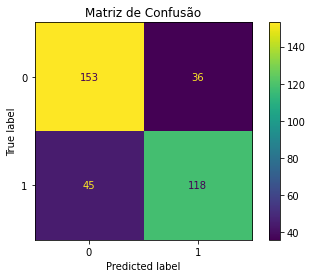

In [69]:
dados_sem_corr = remove_corr_var(dados_limpos)
x,y = separar_x_y(dados_sem_corr)
plot_confusion_matrix(modelo_vencedor, x, y)
plt.title("Matriz de Confusão")
plt.show()

Agora que foi testado o melhor modelo para o projeto, vamos salvá-lo para uso posterior. 

### 4.6. Salvando modelo escolhido para produção

Uma vez que o modelo está pronto, vamos salvá-lo para que este possa ser usado em outro projeto. Antes disso, vamos treiná-lo uma última vez considerando todos os dados como treino. Deste modo, garantimos que o modelo recebeu todas as variâncias do problema. 

In [70]:
dados_sem_corr = remove_corr_var(dados_limpos)
x,y = separar_x_y(dados_sem_corr)

modelo_vencedor.fit(x, y)

LogisticRegression(solver='newton-cg')

Agora salvamos o modelo usando a biblioteca joblib.

In [71]:
from joblib import dump, load
dump(modelo_vencedor, f'{type(modelo_vencedor).__name__}.joblib')

['LogisticRegression.joblib']

## 5.Conclusão

Este projeto buscou analisar, de maneira direta e direta, o banco de dados disponibilizado pelo hospital [Sírio-Libanês](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19). Os dados representam um conjunto de pacientes diagnosticados com COVID-19 que passaram por uma bateria de exames, em determinadas janelas de tempo, e foram encaminhados para Unidade de Terapia Intensiva (UTI) do hospital ou liberados para finalização de tratamento em suas casas.

O que antes necessitava de uma equipe de profissionais da saúde analisando os dados para chegar à conclusão se o paciente deve ser encaminhado ou não para UTI, agora podemos aplicar algoritmos de Machine Learning (ML) para acelerar o processo de decisão.

Os dados recebidos foram manipulados com o intuito de gerar uma planilha coesa, completada com dados numéricos e categóricos de modo que os modelos de ML possam ser aplicados. Após a manipulação, foram analisadas e removidas a variáveis correlacionadas, que dificultariam o cálculo do modelo. 

Uma vez que o *DataFrame* foi totalmente filtrado, a seção seguinte buscou explanar as principais metodologias de separação de dados para treino / teste e medição dos mesmos após aplicação dos modelos de ML. Foi utilizado cálculo da área sob a curva (*ROC-AUC*) como metodologia de comparação entre modelos sendo estes separados em treino e teste pelo critério de validação cruzada (*cross validate*).

Com isto, o melhor modelo que se adapta as condições foi o **aaa** com uma AUC de **bbb**.

Com ele, foi gerado uma matriz de confusão com **XX** verdadeiros Positivos e **XX** Verdadeiros negativos. 




## 6.Referências



*   [Análise do crescimento do COVID-19 por Atila Iamarino](https://www.hypeness.com.br/2020/03/biologo-atila-iamarino-alerta-potencial-de-pessoas-infectaveis-com-coronavirus-e-de-100/)
*   [Kaggle Sírio-Libanês](https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19)
*   [Scikit Learn](https://scikit-learn.org/stable/)
